In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving athlete_events.csv to athlete_events (2).csv
Saving noc_regions.csv to noc_regions (2).csv


In [ ]:
df = pd.read_csv('athlete_events.csv')
df1 = pd.read_csv('noc_regions.csv')

In [ ]:
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df=df[df['Season'] == 'Summer']

In [ ]:
df.shape

(222552, 15)

In [ ]:
df=df.merge(df1,on='NOC',how='left')

In [ ]:
df['region'].unique().shape

(206,)

In [ ]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9189
Height,51857
Weight,53854
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df.duplicated().sum()

1385

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
pd.get_dummies(df['Medal']).astype(int)



,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [ ]:
df = pd.concat([df, pd.get_dummies(df['Medal']).astype(int)], axis=1)


In [ ]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [ ]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [ ]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [ ]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [ ]:
medal_tally

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


In [ ]:
years = df['Year'].unique().tolist()

In [ ]:
years.sort()

In [ ]:
years.insert(0, 'Overall')

In [ ]:
country = np.unique(df['region'].dropna().values).tolist()

In [ ]:
country.sort()

In [ ]:
country.insert(0, 'Overall')

In [ ]:
def fetch_medal_tally(df,year, country):
   medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
   flag = 0
   if year == 'Overall' and country == 'Overall':
      temp_df = medal_df
   if year == 'Overall' and country != 'Overall':
      flag = 1
      temp_df = medal_df[medal_df['region'] == country]
   if year != 'Overall' and country == 'Overall':
      temp_df = medal_df[medal_df['Year'] == int(year)]
   if year != 'Overall' and country != 'Overall':
      temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

   if flag == 1:
      x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
   else:
      x= temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
   x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

   print(x)



In [ ]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [ ]:
medal_df[(medal_df['Year']==2016)&(medal_df['region'] == 'India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,0,0,0
7065,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,0,0,0
8713,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,0,0,0
9202,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,0,0,0
10070,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182260,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,0,0,0
195568,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,0,0,0
198042,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,0,0,0
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0


In [ ]:
fetch_medal_tally(df, year='1900', country='Overall')


            region  Gold  Silver  Bronze  total
0           France    29      41      39    109
1              USA    21      16      17     54
2               UK    19      11      13     43
3          Belgium     6       7       5     18
4      Switzerland     6       2       1      9
5          Germany     4       3       2      9
6        Australia     3       0       3      6
7            Italy     3       2       0      5
8          Denmark     2       3       2      7
9           Sweden     1       0       1      2
10            Cuba     1       1       0      2
11           Spain     1       0       0      1
12          Canada     1       0       1      2
13           Haiti     1       0       0      1
14         Hungary     1       2       2      5
15      Luxembourg     1       0       0      1
16     Netherlands     1       2       4      7
17     New Zealand     1       0       0      1
18          Norway     0       2       3      5
19          Russia     0       0       0

In [ ]:
df['Year'].unique().shape[0]-1

28

In [ ]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [ ]:
df['Sport'].unique().shape

(52,)

In [ ]:
df['Event'].unique().shape

(651,)

In [ ]:
df['Name'].unique().shape

(116122,)

In [ ]:
df['region'].unique().shape

(206,)

In [ ]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values(by='Year')


In [ ]:
nations_over_time.rename(columns={'Year': 'Edition', 'count': 'No of Countries'}, inplace=True)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(nations_over_time, x='Edition', y='No of Countries')
fig.show()

In [ ]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values(by='Year')

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(20, 20))
x = df.drop_duplicates(['Year', 'Sport', 'Event'])
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

<Axes: xlabel='Year', ylabel='Sport'>

In [ ]:
def most_successful(df, sport, top_n=10):
    # Filter data for the given sport and exclude NaN medals
    temp_df = df[(df['Sport'] == sport) & (df['Medal'].notna())]

    # Count total medals won by each athlete
    top_athletes = temp_df['Name'].value_counts().reset_index().head(top_n)
    top_athletes.columns = ['Name', 'Total Medals']

    # Merge to get additional details (Sport, Country)
    top_athletes = top_athletes.merge(df[['Name', 'Sport', 'region']], on='Name', how='left').drop_duplicates()

    return top_athletes


In [ ]:
most_successful(df, 'Gymnastics', top_n=5)

,Name,Total Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
99,Takashi Ono,13,Judo,Japan
100,Sawao Kato,12,Gymnastics,Japan


In [ ]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

In [ ]:
new_df = temp_df[temp_df['region'] == 'india']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [ ]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

In [ ]:
new_df = temp_df[temp_df['region'] == 'India']
plt.figure(figsize=(20, 20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal',aggfunc ='count').fillna(0),annot=True)

<Axes: xlabel='Year', ylabel='Sport'>

In [ ]:
def most_successful(df, country, top_n=10):
    # Filter data for the given country and exclude NaN medals
    temp_df = df[(df['region'] == country) & (df['Medal'].notna())]

    # Count total medals won by each athlete
    top_athletes = temp_df['Name'].value_counts().reset_index().head(top_n)
    top_athletes.columns = ['Name', 'Total Medals']

    # Merge to get additional details (Sport)
    top_athletes = top_athletes.merge(df[['Name', 'Sport']], on='Name', how='left').drop_duplicates()

    return top_athletes



In [ ]:
most_successful(df, 'USA')


,Name,Total Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
61,Natalie Anne Coughlin (-Hall),12,Swimming
73,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
98,Carl Townsend Osburn,11,Shooting
114,Mark Andrew Spitz,11,Swimming
126,"Raymond Clarence ""Ray"" Ewry",10,Athletics
136,"Frederick Carlton ""Carl"" Lewis",10,Athletics


In [ ]:
import plotly.figure_factory as ff

In [ ]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [ ]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [ ]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st


In [ ]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                'Water Polo','Hockey', 'Rowing', 'Fencing',
                'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                'Tennis', 'Golf', 'Softball', 'Archery',
                'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                'Rhythmic Gymnastics', 'Rugby Sevens',
                'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']


In [ ]:
x = []
name = []  # Define 'name' before using it

famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                 'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                 'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                 'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                 'Tennis', 'Golf', 'Softball', 'Archery',
                 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                 'Rhythmic Gymnastics', 'Rugby Sevens',
                 'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

for sport in famous_sports:  # Corrected variable name
    temp_df = athlete_df[athlete_df['Sport'] == sport]  # Corrected
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)  # Now 'name' is correctly defined

fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)
st.title("Distribution of Age wrt Sports(Gold Medalist)")
st.plotly_chart(fig)


2025-02-28 07:44:26.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:44:26.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:44:26.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:44:26.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:44:26.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:44:26.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)


In [ ]:
fig.show()

In [ ]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

<ipython-input-965-b3cc39faac17>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
%matplotlib inline


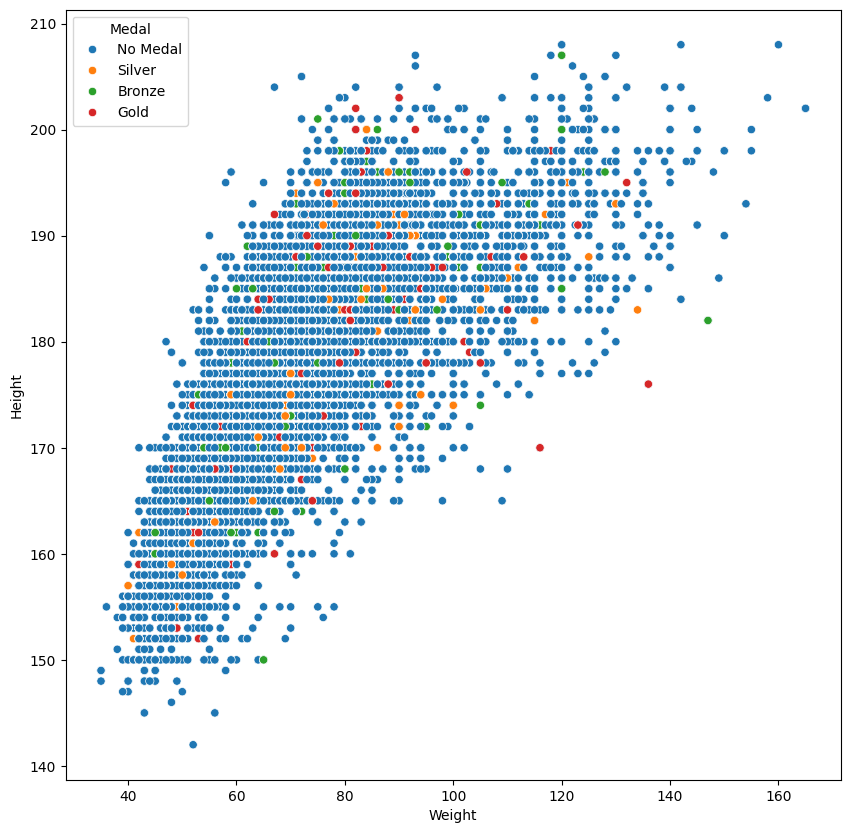

In [ ]:
plt.figure(figsize=(10, 10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'], hue=temp_df['Medal'])
plt.show()


In [ ]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [ ]:
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

In [ ]:
final.fillna(0,inplace =True)

In [ ]:
fig = px.line(final, x='Year', y=['Male', 'Female'])
fig.show()

In [ ]:
pip install gradio


In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [ ]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff


# --- App 1 Functions and UI ---
def display_statistics():
    return f"""
    **Athletes**: {df['Name'].nunique()}
    **Events**: {df['Event'].nunique()}
    **Nations**: {df['region'].nunique()}
    **Sports**: {df['Sport'].nunique()}
    **Editions**: {df['Year'].nunique()}
    """

def medal_tally(year, country):
    temp_df = df.copy()
    if year != "Overall":
        temp_df = temp_df[temp_df["Year"] == int(year)]
    if country != "Overall":
        temp_df = temp_df[temp_df["region"] == country]
    medal_count = temp_df.groupby("region")[["Gold", "Silver", "Bronze"]].sum().reset_index()
    medal_count["Total"] = medal_count["Gold"] + medal_count["Silver"] + medal_count["Bronze"]
    return medal_count if not medal_count.empty else "No Data Available"

def plot_nations_over_time():
    nations = df.drop_duplicates(["Year", "region"]).groupby("Year")["region"].nunique().reset_index()
    return px.line(nations, x="Year", y="region", title="Participating Nations Over the Years")

def plot_events_over_time():
    events = df.drop_duplicates(["Year", "Event"]).groupby("Year")["Event"].nunique().reset_index()
    return px.line(events, x="Year", y="Event", title="Events Over the Years")

def plot_athletes_over_time():
    athletes = df.drop_duplicates(["Year", "Name"]).groupby("Year")["Name"].nunique().reset_index()
    return px.line(athletes, x="Year", y="Name", title="Athletes Over the Years")

def plot_country_medal_tally(country):
    temp_df = df[df["region"] == country].groupby("Year")[["Gold", "Silver", "Bronze"]].sum().reset_index()
    temp_df["Total"] = temp_df["Gold"] + temp_df["Silver"] + temp_df["Bronze"]
    return px.line(temp_df, x="Year", y="Total", title=f"{country} Medal Tally Over the Years") if not temp_df.empty else "No Data Available"

def plot_country_heatmap(country):
    temp_df = df[df['region'] == country].pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0)
    if temp_df.empty:
        return "No Data Available"
    plt.figure(figsize=(12, 8))
    sns.heatmap(temp_df, annot=True, cmap="coolwarm", fmt=".0f")
    plt.title(f"{country} Excels in the Following Sports")
    heatmap_path = "heatmap.png"
    plt.savefig(heatmap_path, bbox_inches="tight")
    plt.close()
    return heatmap_path

def plot_age_distribution():
    athlete_df_local = df.drop_duplicates(subset=['Name', 'region'])
    x1 = athlete_df_local['Age'].dropna().tolist()
    x2 = athlete_df_local[athlete_df_local['Medal'] == 'Gold']['Age'].dropna().tolist()
    x3 = athlete_df_local[athlete_df_local['Medal'] == 'Silver']['Age'].dropna().tolist()
    x4 = athlete_df_local[athlete_df_local['Medal'] == 'Bronze']['Age'].dropna().tolist()
    if not x1:
        return "No Data Available"
    return ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False)

def most_successful(sport):
    temp_df = df[(df['Sport'] == sport) & (df['Medal'].notna())]
    top_athletes = temp_df['Name'].value_counts().reset_index().head(10)
    top_athletes.columns = ['Name', 'Total Medals']
    return top_athletes.merge(df[['Name', 'Sport', 'region']], on='Name', how='left').drop_duplicates()

def most_successful_country(country):
    temp_df = df[(df['region'] == country) & (df['Medal'].notna())]
    top_athletes = temp_df['Name'].value_counts().reset_index().head(10)
    top_athletes.columns = ['Name', 'Total Medals']
    return top_athletes.merge(df[['Name', 'Sport']], on='Name', how='left').drop_duplicates()

years = ["Overall"] + sorted(df["Year"].unique().tolist())
countries = ["Overall"] + sorted(df["region"].dropna().unique().tolist())
sports = sorted(df['Sport'].dropna().unique().tolist())

# --- App 2 Functions and UI ---
sports_list = sorted(athlete_df[athlete_df['Medal'] == 'Gold']['Sport'].unique())
def plot_age_distribution_sport(sport):
    temp_df = athlete_df[(athlete_df['Sport'] == sport) & (athlete_df['Medal'] == 'Gold')]
    ages = temp_df['Age'].dropna().tolist()
    if not ages:
        return "No data available for this sport."
    fig = ff.create_distplot([ages], [sport], show_hist=False, show_rug=False)
    fig.update_layout(autosize=True, width=900, height=500, title=f"Age Distribution for {sport} (Gold Medalists)")
    return fig

# --- App 3 Functions and UI ---
def plot_gender_participation():
    men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
    women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
    final = men.merge(women, on='Year', how='left')
    final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)
    final.fillna(0, inplace=True)
    fig = px.line(final, x='Year', y=['Male', 'Female'], title="Men and Women Participation Over the Years")
    return fig

# --- Integrated App ---
with gr.Blocks() as app:
    gr.Markdown("<h1 style='text-align: center; color: blue;'>🏅 Olympic Data Analysis 🏅</h1>")
    with gr.Tab("Main Analysis"):
        gr.Markdown("<h2 style='color: green; font-size: 22px;'>📊 Top Statistics</h2>")
        gr.Textbox(value=display_statistics(), interactive=False)
        gr.Markdown("<h2 style='color: darkred; font-size: 22px;'>🥇 Medal Tally</h2>")
        year_select = gr.Dropdown(choices=years, label="Select Year", value="Overall")
        country_select = gr.Dropdown(choices=countries, label="Select Country", value="Overall")
        medal_output = gr.Dataframe()
        year_select.change(fn=medal_tally, inputs=[year_select, country_select], outputs=medal_output)
        country_select.change(fn=medal_tally, inputs=[year_select, country_select], outputs=medal_output)
        gr.Markdown("<h2 style='font-size: 22px;'>🌍 Participating Nations Over the Years</h2>")
        gr.Plot(value=plot_nations_over_time())
        gr.Markdown("<h2 style='font-size: 22px;'>🏅 Events Over the Years</h2>")
        gr.Plot(value=plot_events_over_time())

        gr.Markdown("<h2 style='font-size: 22px;'>👨‍🎓 Athletes Over the Years</h2>")
        gr.Plot(value=plot_athletes_over_time())

    with gr.Tab("Country Analysis"):
        gr.Markdown("<h2 style='color: darkred; font-size: 22px;'>🌎 Country-wise Medal Tally</h2>")
        country_medal_select = gr.Dropdown(choices=countries, label="Select Country")
        country_medal_output = gr.Plot()
        country_medal_select.change(fn=plot_country_medal_tally, inputs=country_medal_select, outputs=country_medal_output)

        gr.Markdown("<h2 style='color: blue; font-size: 22px;'>🔥 Heatmap of Country Performance</h2>")
        country_heatmap_select = gr.Dropdown(choices=countries, label="Select Country")
        country_heatmap_output = gr.Image()
        country_heatmap_select.change(fn=plot_country_heatmap, inputs=country_heatmap_select, outputs=country_heatmap_output)

    with gr.Tab("Athlete Analysis"):
        gr.Markdown("<h2 style='color: purple; font-size: 22px;'>📈 Age Distribution of Athletes</h2>")
        gr.Plot(value=plot_age_distribution())

        gr.Markdown("<h2 style='color: orange; font-size: 22px;'>🏆 Most Successful Athletes</h2>")
        sport_select = gr.Dropdown(choices=sports, label="Select Sport")
        successful_output = gr.Dataframe()
        sport_select.change(fn=most_successful, inputs=sport_select, outputs=successful_output)

        gr.Markdown("<h2 style='color: green; font-size: 22px;'>🏅 Most Successful Athletes by Country</h2>")
        country_successful_select = gr.Dropdown(choices=countries, label="Select Country")
        country_successful_output = gr.Dataframe()
        country_successful_select.change(fn=most_successful_country, inputs=country_successful_select, outputs=country_successful_output)

    with gr.Tab("Sport Analysis"):
        gr.Markdown("<h2 style='color: red; font-size: 22px;'>📊 Age Distribution in Sports (Gold Medalists)</h2>")
        sport_age_select = gr.Dropdown(choices=sports_list, label="Select Sport")
        sport_age_output = gr.Plot()
        sport_age_select.change(fn=plot_age_distribution_sport, inputs=sport_age_select, outputs=sport_age_output)

    with gr.Tab("Gender Analysis"):
        gr.Markdown("<h2 style='color: blue; font-size: 22px;'>👫 Men vs Women Participation</h2>")
        gr.Plot(value=plot_gender_participation())

app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3b7a5d706df0cae7ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Drop missing values for height, weight, and medal
df = df.dropna(subset=["Height", "Weight", "Medal"])

# Convert columns to numeric
df["Height"] = pd.to_numeric(df["Height"], errors="coerce")
df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce")

# Unique sports list
sports_list = sorted(df["Sport"].dropna().unique())

# Function to generate scatter plot
def plot_scatter(sport):
    temp_df = df[df["Sport"] == sport]

    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(x=temp_df["Weight"], y=temp_df["Height"], hue=temp_df["Medal"], palette="deep")

    plt.xlabel("Weight (kg)")
    plt.ylabel("Height (cm)")
    plt.title(f"Height vs Weight for {sport}")

    # Save the plot
    plot_path = "scatter_plot.png"
    plt.savefig(plot_path, bbox_inches="tight")
    plt.close()

    return plot_path

# Gradio interface
with gr.Blocks() as app:
    gr.Markdown("<h1 style='text-align: center; color: blue;'>🏅 Sports Scatter Plot 🏅</h1>")
    gr.Markdown("<h3 style='text-align: center;'>Select a sport to visualize Height vs Weight of athletes</h3>")

    sport_dropdown = gr.Dropdown(choices=sports_list, label="Select Sport")
    output_plot = gr.Image(label="Scatter Plot")

    sport_dropdown.change(fn=plot_scatter, inputs=sport_dropdown, outputs=output_plot)

# Run the app
app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c032da800dcd59c271.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
